# Group Project Proposal - Group 50 #

### Introduction ###

**Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.**

**Clearly state the question you will try to answer with your project.**

**Identify and describe the dataset that will be used to answer the question.**

Coronary artery disease, also commonly known as coronary heart disease,  is the most common heart condition across the globe. It is caused by a buildup of plaque within the walls of the coronary arteries, those that supply blood to the heart, and for many, result in chest pain, lightheadedness, or heart attacks. Mostly consisting of cholesterol deposits, this plaque buildup may cause the arteries to narrow over time, obstructing or completely terminating bloodflow (Cleveland Clinic, 2022).  The most common symptom of coronary artery disease is known as a “stable angina,” or “typical angina,” a predictable chest pain that comes and goes and must meet three criteria to be classified as so: It must be substernal (below the sternum), (Sauleda, 2020), provoked by physical activity or emotional distress, and relieved by rest or nitroglycerine. An atypical angina, however, does not meet all of the criteria points above, and may radiate to  parts of the body other than the sternum (Sauleda, 2020). Non- anginal heart pain is chest pain that occurs in a patient who does not have  heart disease, and nonsymptomatic chest pain refers to those with coronary heart disease, but experience little to no symptoms (Fass, Achem, 2011). Although seemingly advantageous, those with no symptoms are more prone to “silent” heart attacks, those that come with no prior symptom or warning (Fass, Achem, 2011). Causes of Coronary Artery Disease are mainly caused by high blood pressure and high cholesterol and according to Kreatsoulas, types of Angina Pain are dependent on gender (Kreatsoulas, 2016). As such in our proposal, we will determine whether the type of chest pain, experienced by Anginal induced patients, is affected by qualitative and quantitative variables. We will be using the 1990 processed Cleveland dataset that will include 14 attributes of a patient's health status, their type of chest pain, gender, age, etc.

### Preliminary exploratory data analysis ###

In [1]:
 ### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


**Demonstrate that the dataset can be read from the web into R.**

The dataset, 'processed_cleveland', can be downloaded from the following website: https://archive.ics.uci.edu/ml/datasets/Heart+Disease
Note that there are no column names in the dataset, but these can be manually added with reference to the attribute information provided.

**Clean and wrangle your data into a tidy format.**

In [2]:
processed_cleveland <- read_csv("processed.cleveland.data", skip = 1, col_names = FALSE) |>
    rename(
        age = X1, 
        sex = X2, 
        cp = X3, 
        trestbps = X4, 
        chol = X5, 
        fbs = X6, 
        restecg = X7, 
        thalach = X8, 
        exang = X9, 
        oldpeak = X10, 
        slope = X11, 
        ca = X12, 
        thal = X13, 
        num = X14
    ) |>
    mutate(cp = as_factor(cp))

processed_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data.**

In [3]:
# Summary table for the type of chest pain and their counts. 
chest_pain_type <- processed_cleveland |>
    select(cp) |> 
    group_by(cp) |>
    summarize(n = n())
chest_pain_type

cp,n
<fct>,<int>
1,23
2,50
3,86
4,144


In [4]:
# Summary table for the type of chest pain and their counts based on gender. 
chest_pain_type_sex <- processed_cleveland |>
    select(cp, sex) |> 
    group_by(cp, sex) |>
    summarize(n = n()) |>
    pivot_wider(
        names_from = sex,
        values_from = n
    ) |>
    rename(
        male = '1',
        female = '0'
    )
chest_pain_type_sex

`summarise()` has grouped output by 'cp'. You can override using the `.groups`
argument.


cp,female,male
<fct>,<int>,<int>
1,4,19
2,18,32
3,35,51
4,40,104


In [5]:
# Summary table for type of chest pain, diagnosis and their count. 
chest_pain_diagnosis_count <- processed_cleveland |>
    group_by(cp, num) |>
    summarize(n = n()) 
chest_pain_diagnosis_count

`summarise()` has grouped output by 'cp'. You can override using the `.groups`
argument.


cp,num,n
<fct>,<dbl>,<int>
1,0,16
1,1,5
1,2,1
⋮,⋮,⋮
4,2,30
4,3,29
4,4,11


In [6]:
# Summary table for proportion of chest pain and their diagnosis. 
chest_pain_diagnosis_proportion <- merge(x = chest_pain_diagnosis_count, y = chest_pain_type, by = "cp") |>
    mutate(percentage = n.x / n.y * 100, na.rm = TRUE) |>
    select(cp, num, percentage)
chest_pain_diagnosis_proportion

chest_pain_diagnosis_proportion_named <- chest_pain_diagnosis_proportion |>
    pivot_wider(
        names_from = num,
        values_from = percentage       
    ) 
chest_pain_diagnosis_proportion_named

cp,num,percentage
<fct>,<dbl>,<dbl>
1,0,69.565217
1,1,21.739130
1,2,4.347826
⋮,⋮,⋮
4,2,20.833333
4,3,20.138889
4,4,7.638889


cp,0,1,2,4,3
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,69.56522,21.73913,4.347826,4.347826,NA
2,82.00000,12.00000,2.000000,NA,4.000000
3,79.06977,10.46512,4.651163,1.162791,4.651163
4,27.08333,24.30556,20.833333,7.638889,20.138889


**Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.**

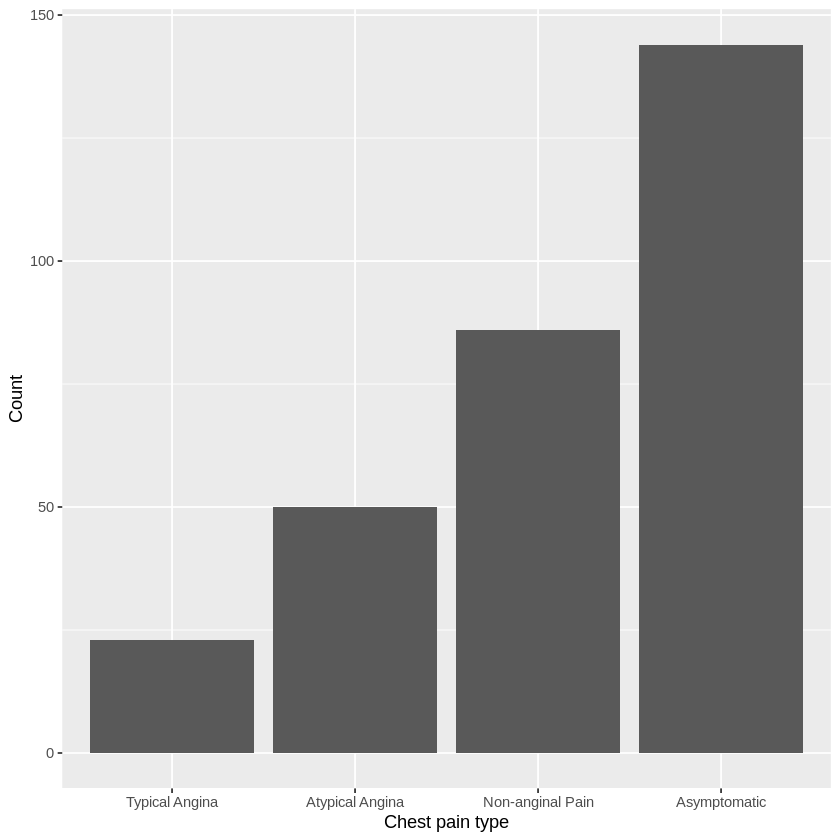

In [7]:
# Plot of the count of different chest pain counts.
chest_pain_bar <- processed_cleveland |>
    ggplot(aes(x = cp)) +
    geom_bar() + 
    labs(x = "Chest pain type", y = "Count") + 
    scale_x_discrete(labels = c('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'))
chest_pain_bar

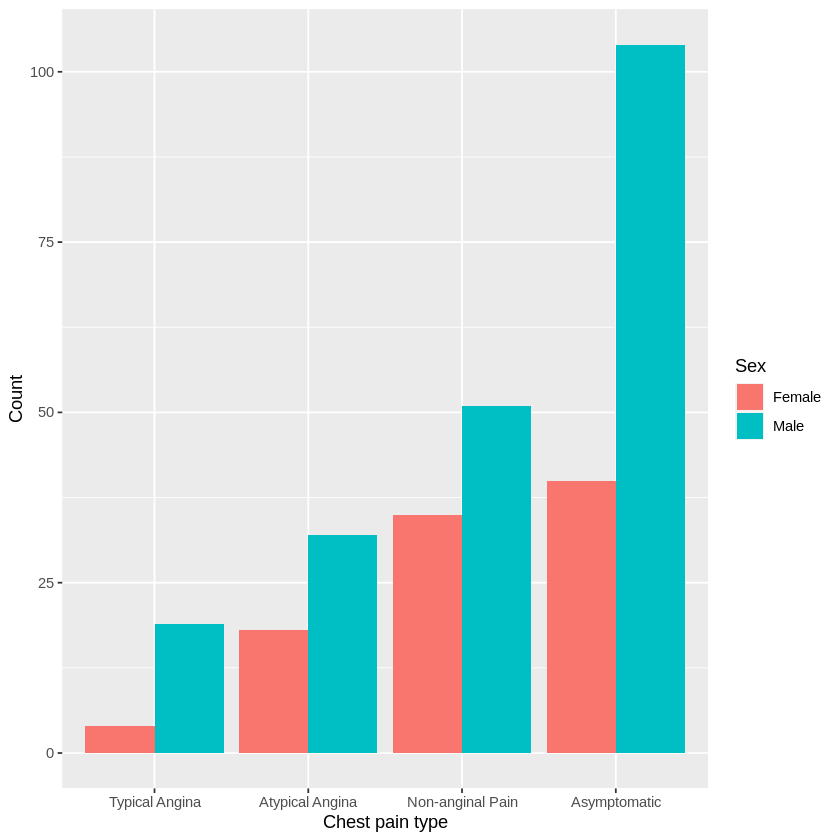

In [8]:
# Plot of the count of different chest pain counts based on gender.
chest_pain_sex_count_plot <- processed_cleveland |>
    ggplot(aes(x = cp, fill = as_factor(sex))) +
    geom_bar(position = position_dodge()) + 
    labs(x = "Chest pain type", y = "Count", fill = "Sex") +
    scale_fill_discrete(labels = c('Female', 'Male')) + 
    scale_x_discrete(labels = c('Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'))
chest_pain_sex_count_plot

### Methods ###

**Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?**

**Describe at least one way that you will visualize the results.**

Given that we are predicting the the type of chest pain the patient experiences, we will be using age, sex, resting blood sugar, maximum heart rate, and levels of chloresterol to determine the type of chest pain. In addition to the predictive hypothesis, we will also be determining whether gender and age have a correlation on the type of chest pain. To visualize these results, we plan to use a bar graph to compare the percentages of type of chest pain versus gender.


In [24]:
#creating training and testing data sets
cleveland_split<-initial_split(processed_cleveland,prop=0.6,strata=cp)
cleveland_train<- training(cleveland_split)
cleveland_test<-testing(cleveland_split)

#perform cross validation
cleveland_vfold<-vfold_cv(cleveland_train,v=10, strata=cp)

#creating recipe and scale predictors
cleveland_recipe<- recipe(cp~age+fbs+thalach+chol,data=cleveland_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

#classification 
knn_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
set_engine("kknn")|>
set_mode("classification")

#create workflow
cleveland_results<-workflow()|>
add_recipe(cleveland_recipe)|>
add_model(knn_spec)|>
tune_grid(resamples=cleveland_vfold,grid=10)|>
collect_metrics()|>
filter(.metric=="accuracy")

! Fold02: internal:
  No observations were detected in `truth` for level(s): '1'
  Computation will proceed by ignoring those levels.

! Fold04: internal:
  No observations were detected in `truth` for level(s): '1'
  Computation will proceed by ignoring those levels.

! Fold07: internal:
  No observations were detected in `truth` for level(s): '1'
  Computation will proceed by ignoring those levels.



### Expected outcomes and significance ###

**What do you expect to find?**
Since coronary heart disease is caused by the buildup of plaque in the arteries, we should expect that patients with a higher cholestoral level to be more prone to anginal chest pain as well as more serious conditions of heart disease. The risk for heart disease also goes up with age (Hermann, 2014), as our bodies start to wear down and our hearts become weaker. Those with a higher blood sugar are also more prone to chest pain and heart attacks, as the sugar can damage the veins over time. In terms of maximum heart rate, those with a resting heart rate greater than 60-100bpm are more prone to chest pain and heart disease, as their hearts simply cannot catch up with the rest of the body(Hermann, 2014).  We may expect that those with more of these factors will experience more severe, anginal chest pain, but also realize that there are exceptions and other elements that can impact both location and type of chest pain. 

**What impact could such findings have?**
Being able to predict the location and type of chest pain for patients,  doctors can prepare accordingly such as prescribing preventative  supplements  and making patients aware of potential risk factors. However, since certain chest pains are signs of heart diseases, by predicting what type of chest pain someone will have, we can use that as an indicator to which heart diseases someone may have.  Those with certain types of chest pains in certain areas can take preventative measures to prevent and mediate the possibility of  heart disease, building healthy habits in terms of excersize and diet. Most importantly, these findings can allow doctors to anticipate heart attacks in patients depending on the location of their chest pain, especially those that have no symptoms.  Silent heart attacks can be deadly, and knowing the presence of heart disease without chest pain can help both the patient and doctor anticipate them. 


**What future questions could this lead to?**
A future question that could be asked may be: How can the type of chest pain caused by sex, resting blood sugar, maximum heart rate, and levels of cholesteral be used to predict the time, severity, and frequency of a heart attack? Although this may not actually be possible, knowing the location and type of chest pain can certainly allow patients of heart disease to anticipate and prepare for heart attacks, especially as pain diminishes or increases unexpectedly. 